<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/29.00-Series_Fourier.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/29.00-Series_Fourier.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/29.00-Series_Fourier.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 28. Ondas sísmicas](28.00-Ondas_sismicas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [30. Transformada discreta de Fourier ->](30.00-Transformada_discreta_Fourier.ipynb)

---


# Séries de Fourier

In [1]:
using LinearAlgebra
using Plots

## Séries de Fourier

* Séries de Fourier são séries compostas de senos e/ou cossenos, ou, ainda, de exponenciais complexas.

* São semelhantes as séries de Tayor, que são séries de potências.

* As séries de Taylor representam funções bastante suaves (ditas *reais analíticas*, em que a série converge uniformemente em vizinhanças apropriadas).

* Já as séries de Fourier podem representar funções de regularidade bem menor.

* As séries de Fourier podem ser interpretadas de um ponto de vista de álgebra linear, com os senos e cossenos formando uma base ortogonal de um espaço de dimensão infinita e a série sendo a representação da função nessa base.

* Assim como séries de potências, as séries de Fourier podem ser definidas para funções em uma ou mais variáveis.

## Séries de Fourier em uma dimensão espacial

* Como senos e cossenos são funções periódicas, as séries de Fourier estão naturalmente ligadas a funções periódicas.

* Mas elas também podem são usadas para representar funções definidas em intervalos limitados. Basta observarmos que podemos transladar a função inúmeras vezes para contruir uma função periódica definida em toda a reta.

* Uma série de Fourier de senos e cossenos de uma função $f:\mathbb{R}\rightarrow\mathbb{R}$ que seja periódica de período $L$ tem a forma
$$ s(x) = \frac{a_0}{2} + \sum_{k=1}^\infty a_k \cos\left(\frac{2k\pi x}{L}\right) + \sum_{k=1}^\infty b_k \sin\left(\frac{2k\pi x}{L}\right), \quad \forall x\in \mathbb{R}. $$

* Na representação acima, $a_k,b_k \in \mathbb{R}$.

* Na forma complexa, temos coeficientes complexos $c_k\in \mathbb{C}$, $k\in \mathbb{Z}$, com a série dada por
$$ s(x) = \sum_{k\in \mathbb{Z}} c_k e^{\frac{i 2k\pi x}{L}}.
$$

* No caso em que $s(x)$ é real, os coeficientes satisfazem a condição de "realidade" $c_{-k} = \overline{c}_k$, como veremos mais pra frente.

### Base de funções

* Via integração por partes e usando a periodicidade das funções seno e cosseno, podemos mostrar que
$$ \begin{align*}
    & \int_{-L/2}^{L/2} \cos\left(\frac{2k\pi x}{L}\right)\cos\left(\frac{2m\pi x}{L}\right)\;\mathrm{d}x = 0, & & \forall k, m = 0, 1, \ldots, \; k\neq m, \\
    & \int_{-L/2}^{L/2} \cos\left(\frac{2k\pi x}{L}\right)\sin\left(\frac{2m\pi x}{L}\right)\;\mathrm{d}x = 0, & & \forall k, m = 0, 1, \ldots, \\
    & \int_{-L/2}^{L/2} \cos\left(\frac{2k\pi x}{L}\right)^2\;\mathrm{d}x = \frac{L}{2}, & & \forall k=0, 1, 2, \ldots, \\
    & \int_{-L/2}^{L/2} \sin\left(\frac{2k\pi x}{L}\right)^2\;\mathrm{d}x = \frac{L}{2}, & & \forall k=1, 2, \ldots.
\end{align*}
$$

* Isso mostra que esses senos e cossenos formam um conjunto ortogonal no espaço das funções (de quadrado integrável) em $[-L/2, L/2]$, quando munido do produto interno
$$ \langle f, g \rangle = \int_{-L/2}^{L/2} f(x)g(x)\;\mathrm{d} x
$$
e norma
$$ \|f\| = \left(\int_{-L/2}^{L/2} |f(x)|^2\;\mathrm{d} x\right)^{1/2}.
$$

* Esse conjunto pode ser normalizado, formando um conjunto ortonormal, dividindo-se os seus elementos por $\sqrt{2/L}$.

### Coeficientes

* Dada uma função periódica $f:\mathbb{R}\rightarrow \mathbb{R}$ de período $L$, podemos obter os *coeficientes de Fourier* de $f$ através de "projeções", nas direções ortogonais geradas pelo conjunto ortogonal (ou ortonomal, se normalizados) de senos e cossenos:
$$ \begin{align*}
  a_0 & = \frac{1}{\|w_0\|^2}\langle f, w_0\rangle = \frac{1}{L} \int_{-L/2}^{L/2} f(x) \;\mathrm{d}x, \\
  a_k & = \frac{1}{\|w_{c,k}\|^2}\langle f, w_{c,k} \rangle = \frac{2}{L}\int_{-L/2}^{L/2} f(x)\cos\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots, \\
  b_k & = \frac{1}{\|w_{s,k}\|^2}\langle f, w_{s,k} \rangle = \frac{2}{L}\int_{-L/2}^{L/2} f(x)\sin\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

* Acima, denotamos o conjunto ortogonal (não-normalizado) por
$$ w_0(x) = 1, \quad w_{c,k} = \cos\left(\frac{2k\pi x}{L}\right), \quad w_{s,k} = \sin\left(\frac{2k\pi x}{L}\right), \quad k = 1, 2, \ldots.
$$

* A expansão em séries de Fourier pode ser escrita na forma
$$ f = c_0 w_0 + \sum_{k=1}^\infty c_{c,k} w_{c,k} + \sum_{k=1}^\infty c_{s,k} w_{s,k}. \\
$$

### Versão ortonormal

* Podemos normalizar o conjunto ortogonal, obtendo o conjunto *ortonormal* (verifique!)
$$ \tilde w_0(x) = \frac{1}{\sqrt{L}}, \quad \tilde w_{c,k} = \sqrt{\frac{2}{L}}\cos\left(\frac{2k\pi x}{L}\right), \quad \tilde w_{s,k} = \sqrt{\frac{2}{L}}\sin\left(\frac{2k\pi x}{L}\right), \quad k = 1, 2, \ldots.
$$

* Nesse caso, os coeficientes são
$$ \begin{align*}
  \tilde a_0 & = \langle f, \tilde w_0\rangle = \frac{1}{\sqrt{L}} \int_{-L}^L f(x) \;\mathrm{d}x, \\
  \tilde a_k & = \langle f, \tilde w_{c,k} \rangle = \sqrt{\frac{2}{L}}\int_{-L}^L f(x)\cos\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots, \\
  \tilde b_k & = \sqrt{\frac{2}{L}}\int_{-L/2}^{L/2} f(x)\sin\left(\frac{k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

* E a expansão toma a forma
$$ f = \tilde c_0 \tilde w_0 + \sum_{k=1}^\infty \tilde c_{c,k} \tilde w_{c,k} + \sum_{k=1}^\infty \tilde c_{s,k} \tilde w_{s,k}. \\
$$

### Coeficientes da série de exponenciais complexas

* No caso da expansão em exponenciais complexas de uma função $L$-periódica $f$, temos
$$ f(x) = \sum_{k\in \mathbb{Z}} c_k e^{\frac{i 2k\pi x}{L}}.
$$

* Nesse caso, os coeficientes complexos $c_k$ são dados por
$$ c_k = \frac{1}{L}\int_{-L/2}^{L/2} f(x)e^{-\frac{i 2k\pi x}{L}}\;\mathrm{d}x.
$$

### Série de Fourier de funções definitas em intervalos limitados

* Dada uma função definida em um intervalo limitado de comprimento $L$, digamos $f:[x_0, x_0+L]\rightarrow\mathbb{R}$, podemos estender $f$ a uma função $L$-periódica na reta fazendo cópias transladadas de $f$.

* Nesse caso, a série de Fourier da função estendida também representa a função original quando a série é restrita ao intervalor $[x_0, x_0 + L]$.

* E por conta das translações, os coeficientes podem ser escritos em termos da função original e de integrais no intervalo $[x_0, x_0 + L]$.

* Por exemplo, para uma função $f:[0,L] \rightarrow \infty$, temos os coeficientes
$$ \begin{align*}
  a_0 & = \frac{1}{L} \int_{0}^{L} f(x) \;\mathrm{d}x, \\
  a_k & = \frac{2}{L}\int_{0}^{L} f(x)\cos\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots, \\
  b_k & = \frac{2}{L}\int_{0}^{L} f(x)\sin\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

* Dois casos típicos são $L=1$ e $L=2\pi$. No caso $L=1$, temos
$$ \begin{align*}
  a_0 & =  \int_{0}^{1} f(x) \;\mathrm{d}x, \\
  a_k & = 2\int_{0}^{1} f(x)\cos\left(2k\pi x\right) \;\mathrm{d}x, & & k = 1, 2, \ldots, \\
  b_k & = 2\int_{0}^{1} f(x)\sin\left(2k\pi x\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

* No caso $L=2\pi$, temos a base de $\sin(k x)$, $\cos(kx)$ e os coeficientes
$$ \begin{align*}
  a_0 & = \frac{1}{2\pi} \int_{0}^{2\pi} f(x) \;\mathrm{d}x, \\
  a_k & = \frac{1}{\pi}\int_{0}^{2\pi} f(x)\cos\left(kx\right) \;\mathrm{d}x, & & k = 1, 2, \ldots, \\
  b_k & = \frac{1}{\pi}\int_{0}^{2\pi} f(x)\sin\left(kx\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

### Série de cossenos

* Observe que, se $f$ for simétrica, i.e. $f(x) = f(-x)$, $x\in [-L/2, L/2]$, então, sendo $\sin(2k\pi x/L)$ antisimétrico, o integrando $f(x)\sin(2k\pi x/L)$ é antisimétrico e os coeficientes $b_k$ todos se anulam.

* Com isso, para uma função simétrica, temos apenas uma série de cossenos:
$$ f(x) = \frac{a_0}{2} + \sum_{k=1}^\infty a_k \cos\left(\frac{2k \pi x}{L}\right), \quad x\in [-L/2,L/2].
$$

* Observe, ainda, que, por conta de $x \mapsto f(x)\cos(2k\pi x/L)$ ser simétrico em relação a $x -> -x$, os coeficientes restantes, $a_k$, podem ser escritos como
$$ \begin{align*}
  a_0 & = \frac{2}{L} \int_0^{L/2} f(x) \;\mathrm{d}x, \\
  a_k & = \frac{4}{L}\int_0^{L/2} f(x)\cos\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x, & & k = 1, 2, \ldots.
\end{align*}
$$

* Por fim, se inicialmente temos uma função qualquer $f$ dada no intervalo $[0,L]$, então podemos estendê-la a uma função simétrica em $[-L,L]$ com
$$ \bar f(x) = \begin{cases} f(x), & x\in [0, L], \\ f(-x), & x\in [-L, 0). \end{cases}
$$

* Para $\bar f$, temos uma série apenas de cossenos, conforme argumentado acima. Mas, no final das contas, restringindo a série a apenas o intervalo $[0,L]$, isso nos dá uma série de cossenos para uma função arbitrária $f$, não apenas para as simétricas.

* Nesse caso, observe que os coeficientes são ligeiramente diferentes, sendo o dobro dos coeficientes da série que contém tanto senos como cossenos, pois teremos um intervalo $[-\tilde L/2, \tilde L/2]$, com $\tilde L = 2L$, não havendo contradições.

* Nesse caso, os elementos da base são
$$ \cos\left(\frac{2k\pi x}{\tilde L}\right) = \cos\left(\frac{k\pi x}{L}\right), \quad k=1,2,\ldots.
$$

* Vale ressaltar, como antes, que isso pode ser adaptado a funções definidas em intervalos quaisquer $[x_0,x_0+L]$, $-\infty<x_0<\infty$, $L>0$.

### Série de senos

* Analogamente, se $f$ for antisimétrica, i.e. $f(x) = -f(-x)$, $x\in [-L/2, L/2]$, então, sendo $\cos(2k\pi x/L)$ simétrico, o integrando $f(x)\cos(2k\pi x/L)$ é antisimétrico e os coeficientes $a_k$ todos se anulam.

* Com isso, para uma função anti-simétrica, temos apenas uma série de senos:
$$ f(x) = \sum_{k=1}^\infty b_k \sin\left(\frac{2k \pi x}{L}\right), \quad x\in [-L/2,L/2].
$$

* Da mesma forma, como $x \mapsto f(x)\sin(2k\pi x/L)$ é simétrico em relação a $x -> -x$, os coeficientes restantes, $b_k$, podem ser escritos como
$$ b_k = \frac{4}{L}\int_0^{L/2} f(x)\sin\left(\frac{2k\pi x}{L}\right) \;\mathrm{d}x,  k = 1, 2, \ldots.
$$

* Por fim, se inicialmente temos uma função qualquer $f$ dada no intervalo $[0,L]$, então podemos estendê-la a uma função anti-simétrica em $[-L,L]$
$$ \bar f(x) = \begin{cases} f(x), & x\in [0, L], \\ -f(-x), & x\in [-L, 0). \end{cases}
$$

* Para $\bar f$, temos uma série apenas de senos, conforme argumentado acima. Mas, no final das contas, restringindo a série a apenas o intervalo $[0,L]$, isso nos dá uma série de senos para uma função arbitrária $f$, não apenas para as anti-simétricas.

* Mais uma vez, observe que os coeficientes são ligeiramente diferentes, sendo o dobro dos coeficientes da série que contém tanto senos como cossenos, pois teremos um intervalo $[-\tilde L/2, \tilde L/2]$, com $\tilde L = 2L$, não havendo contradições.

* Nesse caso, os elementos da base são
$$ \sin\left(\frac{2k\pi x}{\tilde L}\right) = \sin\left(\frac{k\pi x}{L}\right), \quad k=1,2,\ldots.
$$

* Vale ressaltar, como antes, que isso pode ser adaptado a funções definidas em intervalos quaisquer $[x_0,x_0+L]$, $-\infty<x_0<\infty$, $L>0$.

### Funções se anulando nos extremos

* A série de senos é particularmente útil para funções que se anulam nos extremos.

* Isso está ligado ao fato de que todas os senos $\sin(k\pi x/L)$ da base ortonormal se anulam nos extremos $[0,L]$.

* Por outro ponto de vista, se $f:[0,L]\rightarrow \mathbb{R}$ é uma função suave, contínua e que se anula nos extremos, então a extensão a seguir é antisimétrica e contínua em $[-L,L]$
$$ \tilde f(x) = \begin{cases} 
    f(x), & 0\leq x \leq L, \\
    -f(-x), & L \leq x < 0.
    \end{cases}
$$

* Observe, aliás, que repetindo a função a cada intervalo $2nL + [-L, L]$, $n\in \mathbb{Z}$, obtemos uma função periódica contínua em toda a reta.

* Mais ainda, se $f$ for continuamente diferenciável em $[0,L]$ (considerando derivada à direito em $x=0$ e à esquerda em $x=L$), então essas extensões também são continuamente diferenciáveis.

### Funções com derivadas se anulando nos extremos

* No caso em que $f:[0,L]\rightarrow \mathbb{R}$ é periódica, com $f(0)=f(L)$, $f'(0)=f'(L)$, etc., então a extensão simétrica para $[-L,L]$ tem a mesma regularidade de $f$ até onde as derivadas nos extremos coincidem.

* Nesse caso, a série de cossenos é bastante apropriada.

### Representação complexa

* A versão complexa pode ser escrita em termos de senos e cossenos graças à identidade de Euler,
$$ e^{\frac{\pm 2ik\pi x}{L}} = \cos\left(\frac{2k\pi x}{L}\right) \pm i\sin\left(\frac{2k\pi x}{L}\right)
$$

* De fato, usando as propriedades de simetria e anti-simetria do cosseno e do seno, respectivamente,
$$ c_k e^{\frac{2ik\pi x}{L}} + c_{-k} e^{\frac{-2ik\pi x}{L}} = (c_k + c_{-k}) \cos\left(\frac{2k\pi x}{L}\right) + i (c_k - c_{-k})\sin\left(\frac{2k\pi x}{L}\right)
$$

* Sob quais condições temos $a_k$, $b_k$ reais tais
$$ c_k e^{\frac{2ik\pi x}{L}} + c_{-k} e^{\frac{-2ik\pi x}{L}} = a_k \cos\left(\frac{2k\pi x}{L}\right) + b_k\sin\left(\frac{2k\pi x}{L}\right).
$$

* Para isso, precisamos que
$$ c_k + c_{-k} = a_k \in \mathbb{R}, \quad i(c_k - c_{-k}) = b_k \in \mathbb{R}.
$$

* Escrevendo $c_k=\alpha_k + i\beta_k$ e $c_{-k} = \alpha_{-k} + i\beta_{-k}$, com os alfas e betas reais, temos
$$ \begin{align*}
  c_k + c_{-k} & = \alpha_k + \alpha_{-k} + i(\beta_k + \beta_{-k}) \quad \Longrightarrow \quad \beta_k = -\beta_{-k} \\
  i(c_k - c_{-k}) & = - (\beta_k - \beta_{-k}) + i(\alpha_k - \alpha_{-k}) \quad \Longrightarrow \quad \alpha_k = \alpha_{-k}
  \end{align*}
$$

* Logo, $c_{-k} = \alpha_{-k} + i\beta_{-k} = \alpha_k - i\beta_k = \overline{c_k}$.

* Ou seja, os coeficientes devem ser complexos conjugados entre si: 
$$ c_{-k} = \overline{c_k}.
$$

* Além disso, podemos escrever, mais explicitamente, que
$$ c_0 = \frac{a_0}{2}, \quad c_k = \frac{a_k + ib_k}{2}, \quad c_{-k} = \frac{a_k - ib_k}{2}, \qquad k=1, 2, \ldots.
$$

* Inversamente,
$$ a_0 = 2c_0, \quad a_k = 2\mathrm{Re}(c_k), \quad b_k = 2\mathrm{Im}(c_k), \qquad k=1,2,\ldots.
$$

### Fase da onda

* Ambos $\sin(2k\pi x/L)$ e $\cos(2k\pi x/L)$ têm o mesmo período $L/k$ e a mesma frequência $\omega = k/L$. Assim como qualquer combinação linear deles.

* Eles todos podem ser escritos na forma de seno ou de cosseno através da inclusão de um termo de translação chamado de **fase**.

* Denotando essa fase por $\varphi$, temos, por exemplo,
$$ \sin\left(\frac{2k\pi x}{L}\right) = \cos\left(\varphi + \frac{2k\pi x}{L}\right), \quad \varphi = \frac{\pi}{2}.
$$

* Mais geralmente, se $A$ e $B$ são reais, então $\alpha = A/\sqrt{A^2+B^2}$ e $\beta=B/\sqrt{A^2+B^2}$ são tais que $\alpha^2 + \beta^2 = 1$.

* Assim, existe um ângulo $\varphi$ tal que $\alpha = \cos\varphi$ e $\beta=\sin\varphi$, de modo que
$$ \begin{multline*}
  A\sin\left(\frac{2k\pi x}{L}\right) + B \cos\left(\frac{2k\pi x}{L}\right) = \sqrt{A^2+B^2}\left(\alpha\sin\left(\frac{2k\pi x}{L}\right) + \beta \cos\left(\frac{2k\pi x}{L}\right) \right) \\
  = \sqrt{A^2+B^2}\left(\cos\varphi\sin\left(\frac{2k\pi x}{L}\right) + \sin\varphi \cos\left(\frac{2k\pi x}{L}\right) \right) = \sqrt{A^2+B^2}\sin\left(\varphi + \frac{2k\pi x}{L}\right).
  \end{multline*}
$$

* Escolhendo a fase $\varphi$ tal que $\alpha = \sin\varphi$ e $\beta=-\cos\varphi$, também podemos escrever
$$ \begin{multline*}
  A\sin\left(\frac{2k\pi x}{L}\right) + B \cos\left(\frac{2k\pi x}{L}\right) = \sqrt{A^2+B^2}\left(\alpha\sin\left(\frac{2k\pi x}{L}\right) + \beta \cos\left(\frac{2k\pi x}{L}\right) \right) \\
  = \sqrt{A^2+B^2}\left(\sin\varphi\sin\left(\frac{2k\pi x}{L}\right) - \cos\varphi \cos\left(\frac{2k\pi x}{L}\right) \right) = \sqrt{A^2+B^2}
  \cos\left(\varphi + \frac{2k\pi x}{L}\right).
  \end{multline*}
$$

### Amplitude

* Pensando em uma onda senoidal
$$ a_k\sin\left(\frac{2k\pi x}{L}\right) + b_k \cos\left(\frac{2k\pi x}{L}\right), \quad k=1, 2, \ldots.
$$

* Vimos acima que podemos escrevê-la em termos de um único seno ou um único cosseno, com uma fase apropriada e com a amplitude
$$ R = \sqrt{a_k^2 + b_k^2}
$$

* E lembrando das relações
$$ a_0 = 2c_0, \quad a_k = 2\mathrm{Re}(c_k), \quad b_k = 2\mathrm{Im}(c_k), \qquad k=1,2,\ldots.
$$

* Vemos que
$$ R = \sqrt{4\mathrm{Re}(c_k)^2 + 4\mathrm{Im}(c_k)^2} = 2 |c_k|, \quad k=1,2,\ldots.
$$

* No caso $k=0$, pensando no coeficiente de Fourier $a_0/2$, a amplitude dessa "onda" constante é o próprio $a_0/2$, portanto,
$$ R = \frac{|a_0|}{2} = |c_0|
$$

## Convergência

* A convergência da série para a função depende da regularidade da função.

* Na verdade, há vários tipos de convergência (pontual, uniforme, quase-sempre, etc.) e várias condições para essas convergências.

* Por exemplo, caso uma função $f$ seja **diferenciável** em um ponto, então a série converge **pontualmente** para $f$, nesse ponto, naturalmente.

* Caso a função seja **continuamente diferenciável** no intervalo, então a convergência é **uniforme**.

* As convergências **pontual** e **uniforme** acima se estendem, ainda, aos casos em que $f$ é **Hölder contínua** no ponto ou no intervalo, respectivamente.

* Caso a função seja **descontínua em um ponto, mas com limites e derivadas bem definidas em cada lado do ponto**, então a série converge naquele ponto, para o valor médio dos limites laterais da função, sofrendo, no entando, o **efeito de Gibbs**, em que as somas parcias da série oscilam cada vez mais, conforme mais termos são incluídos.

* Caso a função seja de **quadrado integrável**, então a convergência se dá na **norma $L^2$**, i.e. do espaço de funções de quadrado integrável.

* Caso a função pertença a um espaço $L^p$ com $p>1$, i.e. a sua potência $p$ seja integrável, então a convergência é **quase-sempre**.

* Caso a função seja apenas contínua, a série pode não convergir...

### Convergência em $L^2$

* A convergência em $L^2$ é a mais simples de se "enxergar".

* Como dito acima, é uma generalização, para dimensão infinita, do conceito de representação de um vetor em uma base ortogonal.

* O espaço $L^2$ é um exemplo do que chamamos, mais geralmente, de um espaço de Hilbert:
  * Possui um produto interno;
  * É completo, o que significa dizer que sequências de Cauchy convergem.
  
* Outro exemplo bastante conhecido é o espaço Euclidiano, ou seja, o $\mathbb{R}^n$ munido do produto escalar.

### Convergência em $L^2$ da série de senos

* Para simplificar, vamos considerar apenas a série de senos, mas as mesmas ideias podem ser reproduzidas para as outras séries.

* Vamos considerar uma função no intervalo $I=[0,L]$, buscando a representação obtida com o argumento acima de extensão para uma função anti-simétrica.

* Denotamos o conjunto ortogonal de senos por $\{w_{s,k}\}_{k\in\mathbb{N}}$, onde
$$ w_{s,k}(x) = \sin\left(\frac{k \pi x}{L}\right), \quad 0\leq x \leq L.
$$

* O espaço $L^2(0,L)$ é o conjunto de funções de quadrado integrável em $I$, com produto interno e normas dados por
$$ \langle f, g \rangle = \int_0^L f(x)g(x)\;\mathrm{d} x, \qquad \|f\| = \left(\int_0^L |f(x)|^2\;\mathrm{d} x\right)^{1/2}.
$$

#### Coeficientes de Fourier e somas parciais

* Dada uma função $f$ em $L^2(0,L)$, denotamos os coeficientes de Fourier de $f$ por
$$ \hat f_k = \frac{1}{\|w_{s,k}\|^2}\langle f, w_{s,k} \rangle, \quad k=1, 2, \ldots.
$$

* Como $f$ tem quadrado integrável (bastaria integrável), os coeficientes estão bem definidos.

* As somas parciais são denotadas por
$$ S_m(f) = \sum_{k=1}^m \hat f_k w_{s,k}.
$$

#### Somas parciais como projeções ortogonais

* Um primeiro resultado importante é que cada soma parcial $S_m(f)$ é a melhor aproximação de $f$ no subsespaço $E_m$ gerado pelos primeiros $m$ elementos $w_{s,1}, \ldots, w_{s,m},$ do conjunto ortogonal.

* De fato, $S_m(f)$ é a **projeção ortogonal** de $f$ em $E_m$.

* Para ver isso, precisamos mostrar que $f-S_m(f) \perp v$, para qualquer $v\in E_m$, ou seja
$$ \langle f - S_m(f), v \rangle = 0, \qquad \forall \in E_m.
$$

* Mais explicitamente, devemos mostrar que
$$ \langle f - \sum_{k=1}^m \hat f_k w_{s,k}, \sum_{j=1} c_j w_{s,j} \rangle = 0,
$$
para quaisquer $c_1, \ldots, c_m\in \mathbb{R}$.

* Como o conjunto é ortogonal, temos
$$ \begin{multline*}
  \langle f - \sum_{k=1}^m \hat f_k w_{s,k}, \sum_{j=1}^m c_j w_{s,j} \rangle = \sum_{j=1}^m c_j\langle f, w_{s,j}\rangle - \sum_{k=1}^m \hat f_kc_k\|w_{s,k}\|^2 \\= \sum_{k=1}^m c_k \left(\langle f, w_{s,j}\rangle - \hat f_k\|w_{s,k}\|^2 \right).
  \end{multline*}
$$

* Lembrando que $\hat f_k = \langle f, w_{s,k} \rangle/\|w_{s,k}\|^2$, vemos que cada termo do somatório acima se anula, nos dando a ortogonalidade.

* A construção acima, na verdade, pode ser usada como ponto de partida para a obtenção dos coeficientes de Fourier apropriados.

#### Somas parciais como melhores aproximações

* Naturalmente, como $E_m \subset E_n$, para quaisquer $m\leq n$, as aproximações ficam cada vez melhores (a menos que $f\in E_m$).

* Mais precisamente, observe, primeiro, que
$$ \begin{multline*}
  \|f - S_m(f)\|^2 = \|f - S_n(f) + S_n(f) - S_m(f)\|^2 \\
  = \|f - S_n(f)\|^2 + 2\langle f - S_n(f), S_n(f) - S_m(f) \rangle + \|S_n(f) - S_m(f)\|^2.
  \end{multline*}
$$

* Como $S_n(f), S_m(f)\in E_n$, então $S_n(f)-S_m(f) \in E_n$.

* Como $S_n(f)$ é a projeção ortogonal de $f$ em $E_n$, então $f-S_n(f)$ é perpendicular a $E_n$, em paricular ortogonal a $S_n(f)-S_m(f)$.

* Assim, $\langle f - S_n(f), S_n(f) - S_m(f) \rangle = 0$, de modo que
$$ \|f - S_m(f)\|^2 =  \|f - S_n(f)\|^2 + \|S_n(f) - S_m(f)\|^2 \geq  \|f - S_n(f)\|^2.
$$

* Além disso, se $f\notin E_m$, então $S_n(f) \neq S_m(f)$ e vale a desigualdade estrita
$$ \|f - S_m(f)\|^2 >  \|f - S_n(f)\|^2.
$$

#### Convergência

* A convergência é o ponto mais delicado.

* Vamos simplificar assumindo hipóteses mais fortes de regularidade.

* Vamos assumir, aqui, que $f$ é continuamente diferenciável.

* Assim, integrando por partes,
$$ \begin{multline*}
    \hat f_k = \frac{1}{L} \int_0^L f(x)\sin\left(\frac{k\pi x}{L}\right) \;\mathrm{d}x \\ 
    =  - \left.\frac{f(x)}{k\pi}\cos\left(\frac{k\pi x}{L}\right)\right|_{x=0}^L + \frac{1}{k\pi}\int_0^L f'(x)\cos\left(\frac{k\pi x}{L}\right)\;\mathrm{d}x \\
  = - \frac{f(L)}{k\pi}(-1)^k + \frac{f(0)}{k\pi} + \frac{1}{k\pi}\int_0^L f'(x)\cos\left(\frac{k\pi x}{L}\right)\;\mathrm{d}x.
  \end{multline*}
$$

* Dessa forma, usando que o cosseno está entre $-1$ e $1$, obtemos a estimativa
$$ |\hat f_k| \leq \frac{1}{k\pi}\left( \max\{|f(0)|, |f(L)|\} + \sqrt{L}\|f'\| \right) = \mathcal{O}\left(\frac{1}{k}\right).
$$

* Agora, a sequência de séries parciais satisfaz, com $n>m$,
$$ \begin{multline*}
  \|S_n(f) - S_m(f)\|^2 = \| \sum_{k=m+1}^n \hat f_k w_{s,k} \|^2 = \sum_{k=m+1}^n |\hat f_k|^2 \|w_{s,k}\|^2 \\ 
  \leq \sum_{k=m+1}^n \frac{\|f'\|^2}{k^2\pi^2} \leq \sum_{k=m+1}^\infty \frac{\|f'\|^2}{k^2\pi^2} \rightarrow 0, \quad m\rightarrow \infty.
  \end{multline*}
$$

* Portanto, $\{S_m(f)\}_m$ é uma sequência de Cauchy em $L^2(0,L)$ e, como esse espaço é completo, converge, em $L^2$, para uma função $s(x)$:
$$ S_m(f) \rightarrow s(s), \quad m\rightarrow \infty.
$$

#### Convergência para $f$

* Falta mostra que $s=f$, ou seja, que a série converge, de fato, para $f$, ao invés de para alguma outra função (por exemplo, se $\bigcup E_n \subsetneqq L^2$).

## Exemplos

* Vamos considerar funções em um intervalo $[0,L]$ e expansões em séries de senos.

* No cálculo numérico, definimos uma resolução espacial para a função e um número máximo de termos da série.

In [2]:
L = 1.0
x = 0.0:0.01:L
ν₁ = 1/(2L) # smallest frequency, inverse of the largest period λ = 2L of sin(kπx/L), for wavenumber k=1
nothing

In [3]:
M = 100
ν = ν₁ * (1:M)
nothing

### Função para cálculo dos coeficientes e das somas parciais da séries

In [4]:
"""
    serie_senos(f::Vector{T}, x::Union{Vector{T}, AbstractRange{T}}, L::T, M::Int64) where {T<:Float64}

Retorna os `M` primeiros coeficientes e somas parciais da série de senos da função `f`.

Assume-se que a função `f` está definida na malha `x` e que a malha `x` é uniforme e
se estende de `0.0` a `L`.

Retorna o par `f̂, S`, onde `f̂::Vector{Float64}` contém os coeficientes da série
e onde as colunas de `S:Matrix{Float64}` contêm as somas parciais da série.
"""
function serie_senos(f::Vector{T}, x::Union{Vector{T}, AbstractRange{T}}, L::T, M::Int64) where {T<:Float64}
    dx = L / (length(x) - 1)
    f̂ = fill(0.0, M) # prealocando vetor para os coeficientes da série de senos
    S = fill(0.0, length(x), M) # prealocando matriz cujas colunas serão as somas parciais da séries
    for m = 1:M
        f̂[m] = (2/L) * sum(f ⋅ sin.(m * π * x / L)) * dx
        if m == 1
            S[:,m] = f̂[m] * sin.(m * π * x / L)
        else
            S[:,m] = S[:,m-1] .+ f̂[m] * sin.(m * π * x / L)
        end
    end
    return f̂, S
end

serie_senos

### Função suave

* Primeiramente, vamos considerar uma função suave.

* Escolhemos um polinômio de grau quatro que se anula, junto com as suas derivadas, nos extremos do intervalo $[0,L]$:
$$ f(x) = x^2(L-x)^2.
$$

* Nesse caso, como a função é suave, a convergência da série de senos é rápida.

* Mais precisamente, como a função é continuamente infinitas vezes diferenciável e tanto a função quanto a sua primeira derivada se anulam nos extremos do intervalo, os coeficientes da série decam com o quadrado do número de onda $k$.

In [5]:
fpol = x.^2 .* (L .- x).^2 # função discretizada
fpol_str = "x²(L-x²)"
f̂pol, Spol = serie_senos(fpol, x, L, M)

([0.0556930353147588, 4.2081105039362e-18, -0.008265038705959678, 5.620910637979537e-19, -0.0019637072586061294, 7.2655098083684865e-19, -0.0007335498612589683, -4.948027664680721e-19, -0.0003486041924548694, 1.2164070748929556e-18  …  -1.4517390709121127e-7, -7.928906012658055e-19, -1.1172388030253702e-7, 4.006601365784401e-18, -7.917319701436914e-8, 2.9916187257485184e-18, -4.7254197580442814e-8, -5.4604588808470495e-17, -1.5709988264326937e-8, -1.8523187059874905e-18], [0.0 0.0 … 0.0 0.0; 0.0017493605146015794 0.0017493605146015796 … 9.800999999983855e-5 9.800999999983855e-5; … ; 0.0017493605146015763 0.0017493605146015761 … 9.800999999982155e-5 9.800999999982155e-5; 6.820429743301986e-18 6.8204297433019855e-18 … -2.713478482494707e-19 -2.7134784824947434e-19])

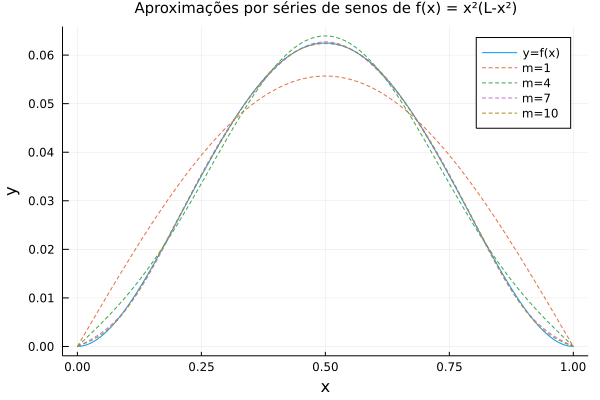

In [6]:
plot(x, fpol, title="Aproximações por séries de senos de f(x) = $fpol_str", titlefont=10,
    xlabel="x", ylabel="y", label="y=f(x)", legend=:topright)
plot!(x, Spol[:,1:3:10], label = hcat(["m=$m" for m in 1:3:10]...), linestyle=:dash)

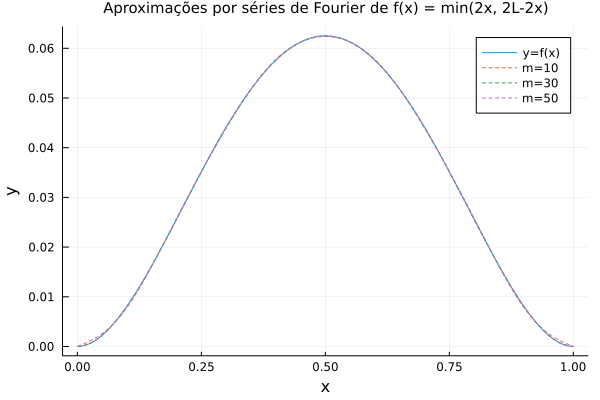

In [7]:
plot(x, fpol, title="Aproximações por séries de Fourier de f(x) = min(2x, 2L-2x)", titlefont=10,
    xlabel="x", ylabel="y", label="y=f(x)", legend=:topright)
plot!(x, Spol[:,10:20:50], label = hcat(["m=$m" for m in 10:20:50]...), linestyle=:dash)

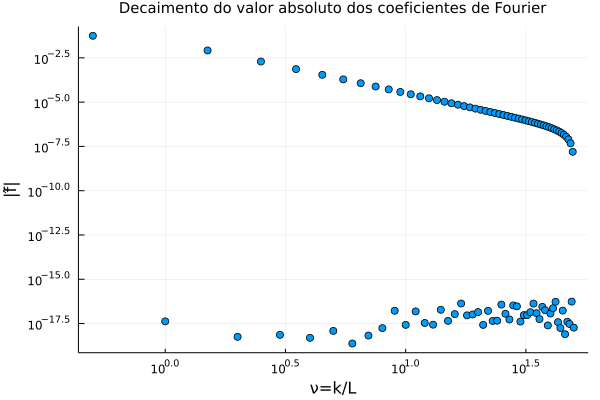

In [8]:
scatter(ν, abs.(f̂pol),
    title="Decaimento do valor absoluto dos coeficientes de Fourier", titlefont=10,
    xlabel="ν=k/L", ylabel="|f̂|", label=false, xscale=:log10, yscale=:log10)

### Onda triangular

* Observe que a onda triangular é contínua, e com derivada contínua por partes, portanto a convergência é uniforme.

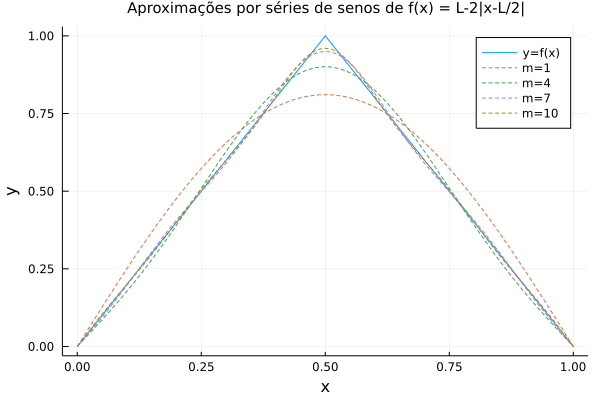

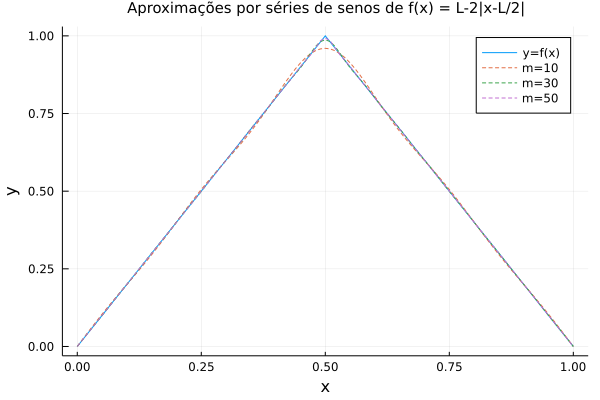

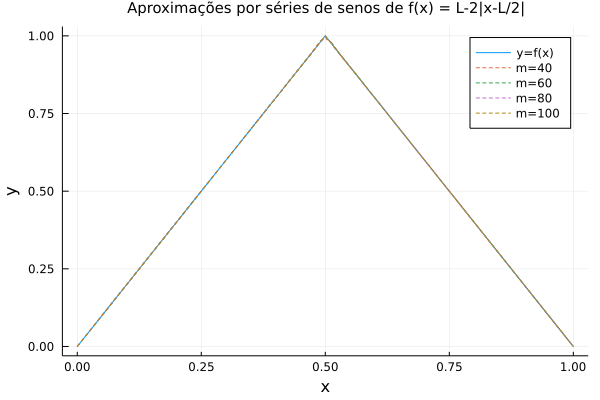

In [9]:
ftri = L .- 2*abs.(x .- L/2)
ftri_str = "L-2|x-L/2|"
f̂tri, Stri = serie_senos(ftri, x, L, M)
for mrange in (1:3:10, 10:20:50, 40:20:100)
    p = plot(x, ftri, title="Aproximações por séries de senos de f(x) = $ftri_str", titlefont=10,
        xlabel="x", ylabel="y", label="y=f(x)", legend=:topright)
    plot!(p, x, Stri[:,mrange], label = hcat(["m=$m" for m in mrange]...), linestyle=:dash)
    display(p)
end

#### Decaimento dos coeficientes de Fourier

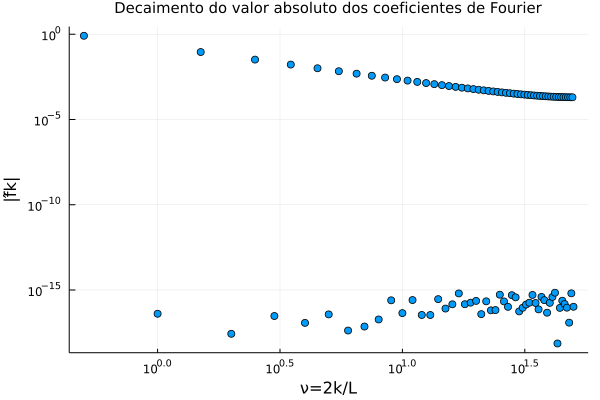

In [10]:
scatter(ν, abs.(f̂tri),
    title="Decaimento do valor absoluto dos coeficientes de Fourier", titlefont=10,
    xlabel="ν=2k/L", ylabel="|f̂k|", label=false, xscale=:log10, yscale=:log10)

### Onda quadrada e o fenômeno de Gibbs

* A onda quadrada é contínua por partes e continuamente diferenciável por partes.

* Nos pontos de descontinuidade, a série de Fourier converge para o ponto médio dos valores extremos e apresenta o fenômeno de Gibbs.

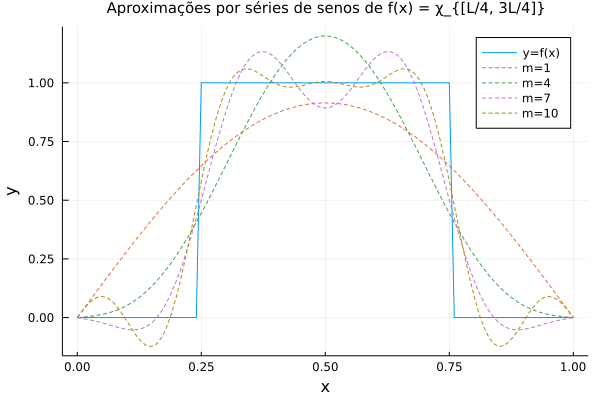

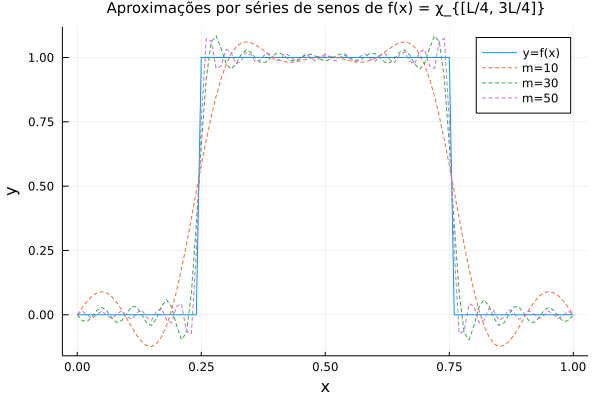

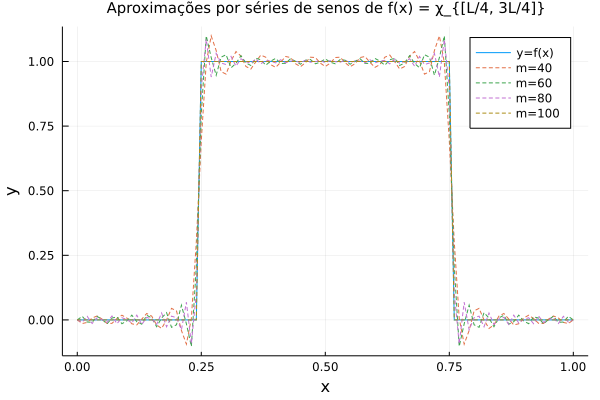

In [11]:
fquad = ifelse.(L/4 .≤ x .≤ 3L/4, 1.0, 0.0)
fquad_str = "χ_{[L/4, 3L/4]}" # A função caraterística do intervalo [L/4, 3L/4]
f̂quad, Squad = serie_senos(fquad, x, L, M)
for mrange in (1:3:10, 10:20:50, 40:20:100)
    p = plot(x, fquad, title="Aproximações por séries de senos de f(x) = $fquad_str", titlefont=10,
        xlabel="x", ylabel="y", label="y=f(x)", legend=:topright)
    plot!(p, x, Squad[:,mrange], label = hcat(["m=$m" for m in mrange]...), linestyle=:dash)
    display(p)
end

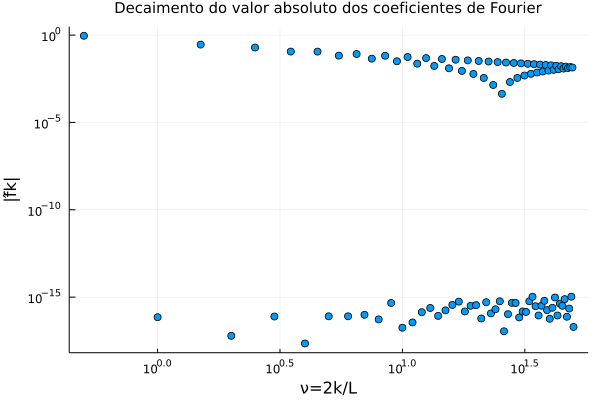

In [12]:
scatter(ν, abs.(f̂quad),
    title="Decaimento do valor absoluto dos coeficientes de Fourier", titlefont=10,
    xlabel="ν=2k/L", ylabel="|f̂k|", label=false, xscale=:log10, yscale=:log10)

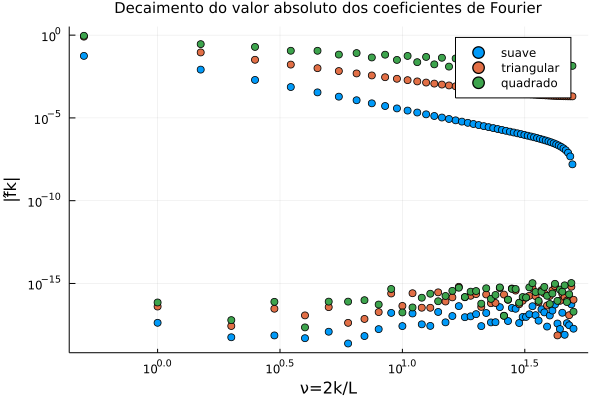

In [13]:
scatter(ν, abs.(f̂pol), xscale=:log10, yscale=:log10, 
    title="Decaimento do valor absoluto dos coeficientes de Fourier", titlefont=10,
    xlabel="ν=2k/L", ylabel="|f̂k|", label="suave")
scatter!(ν, abs.(f̂tri), xscale=:log10, yscale=:log10,
    xlabel="ν=2k/L", ylabel="|f̂k|", label="triangular")
scatter!(ν, abs.(f̂quad), xscale=:log10, yscale=:log10,
    xlabel="ν=2k/L", ylabel="|f̂k|", label="quadrado")

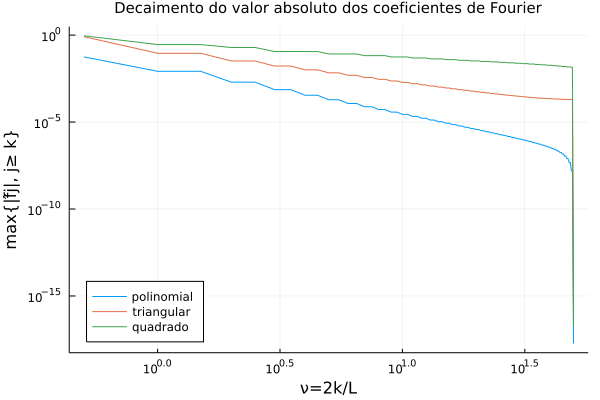

In [14]:
decai_pol = abs.(f̂pol)
decai_tri = abs.(f̂tri)
decai_quad = abs.(f̂quad)
for j in M-1:-1:1
    decai_pol[j] = max(decai_pol[j], decai_pol[j+1])
    decai_tri[j] = max(decai_tri[j], decai_tri[j+1])
    decai_quad[j] = max(decai_quad[j], decai_quad[j+1])
end
plot(ν, decai_pol, yaxis=:log10, xaxis=:log10,
    title="Decaimento do valor absoluto dos coeficientes de Fourier", titlefont=10,
    xlabel="ν=2k/L", ylabel="max{|f̂j|, j≥ k}", label="polinomial", legend=:bottomleft) 
plot!(ν, decai_tri, label="triangular", yaxis=:log10, xaxis=:log10) 
plot!(ν, decai_quad, label="quadrado", yaxis=:log10, xaxis=:log10) 

### Combinação de senos

* Para concluir, vamos considerar uma combinação de senos com frequências múltiplas da frequência básica $\nu_1 = 1/(2L)$.

* Nesse caso, esperamos que a função seja igual as somas parciais com um número suficiente de termos.

* E que o espectro seja não negativo apenas nos termos correspondentes às frequências existentes na definição da função.

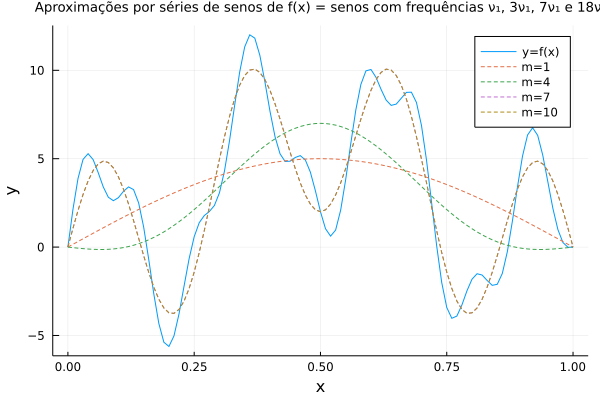

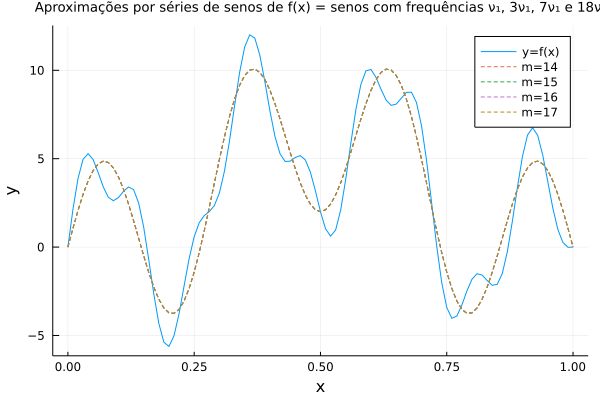

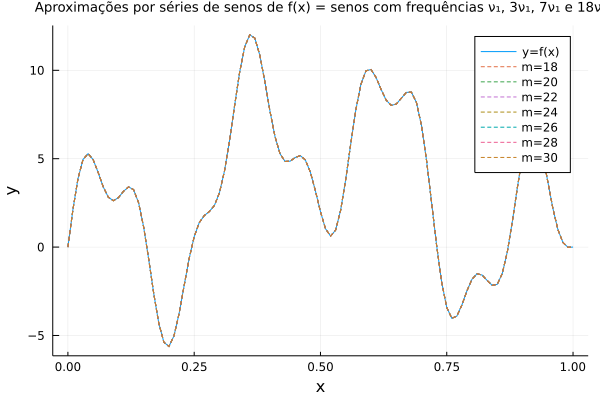

In [15]:
fcs = 5sin.(π * 2ν₁ * x) .- 2sin.(3π * 2ν₁ * x) .+ 5sin.(7π * 2ν₁ * x) .+ 2sin.(18π * 2ν₁ * x)
fcs_str = "senos com frequências ν₁, 3ν₁, 7ν₁ e 18ν₁" # A função caraterística do intervalo [L/4, 3L/4]
f̂cs, Scs = serie_senos(fcs, x, L, M)
for mrange in (1:3:10, 14:17, 18:2:30)
    p = plot(x, fcs, title="Aproximações por séries de senos de f(x) = $fcs_str", titlefont=9,
        xlabel="x", ylabel="y", label="y=f(x)", legend=:topright)
    plot!(p, x, Scs[:,mrange], label = hcat(["m=$m" for m in mrange]...), linestyle=:dash)
    display(p)
end

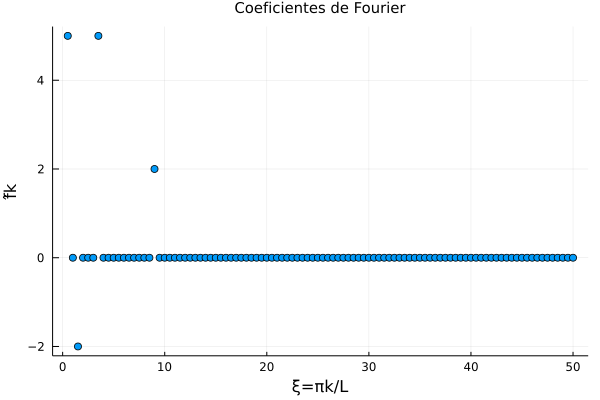

In [16]:
scatter(ν, f̂cs,
    title="Coeficientes de Fourier", titlefont=10,
    xlabel="ξ=πk/L", ylabel="f̂k", label=false)

## Exercícios

1. Escreva a expansão em série de senos e cossenos de uma função $f$ definida em um intervalo $[L_0, L_1]$, incluindo a fórmula dos coeficientes.

1. Escreva a expansão em série apenas de senos de uma função $f$ definida em um intervalo $[L_0, L_1]$, incluindo a fórmula dos coeficientes.

1. Escreva a expansão em série apenas de cossenos de uma função $f$ definida em um intervalo $[L_0, L_1]$, incluindo a fórmula dos coeficientes.

1. Calcule explicitamente os coeficientes da série de senos da função triangular $f(x) = L-2|x-L/2|$, $0\leq x \leq L$, $L>0$, e observe que todos os coeficientes $\hat f_k$ com $k$ par se anulam. 

1. Mostre que se $f:[0,L]\rightarrow \mathbb{R}$ é duas vezes continuamente diferenciável em $[0,L]$ e $f(0)=f(L)=0$, então os coeficientes da série de senos de $f$ decaem da ordem $k^{-2}$.

1. Implemente uma função para o cálculo numérico da expansão em série de cossenos, analoga à feita acima para a série de senos, e calcule os coeficientes e as somas parciais das séries de cossenos das funções trabalhadas acima (polinômio, onda triangular e onda quadrada).

<!--NAVIGATOR-->

---
[<- 28. Ondas sísmicas](28.00-Ondas_sismicas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [30. Transformada discreta de Fourier ->](30.00-Transformada_discreta_Fourier.ipynb)